In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import random
from scipy import odr

In [2]:
def func(x, a, b, c, d):
    y = a*x**3 + b*x**2 + c * x + d
    return y

In [3]:
def func1(x, a, b, c, d,e, f, g, h):
    y = a*x**7 + b*x**6 + c * x**5 + d*x**4 +e*x**3 + f*x**2 +g*x +h
    return y

In [4]:
x=np.arange(-3500,3500,1)

In [5]:
def fermi(x,amp):
    y=[0]*len(x)
    for i in range (1, len(x)):
        if (x[i]<5):
            y[i]=amp*(1-(1/(np.exp(x[i])+1)))
        else:
            y[i]=0
    return y

In [6]:

def expo(amp, x, tau):
    y=[0]*len(x)#x*0
    for i in range (1, len(x)): 
        if (x[i] >= 5):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

In [7]:
Fermi=fermi(x,5)

In [8]:
#plt.plot(Fermi)
#plt.xlim(3490,3515)

In [9]:
N=[0.]*7000
N=np.array(N)
for i in range (0,7000):
    N[i]=random.uniform(-1,1)
N=N*0
#now baseline offset
baseline_c=[0]*7000
baseline_c=np.array(baseline_c)
A = baseline_c+expo(5, x, 500)
A=np.array(A)
#Hence the total signal
T=A+N+Fermi

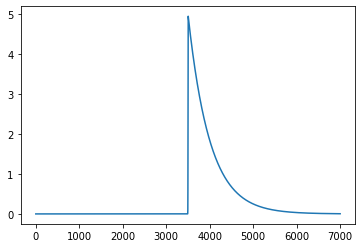

In [10]:
plt.plot(T)
#plt.xlim(3400,3800)

In [11]:
df = pd.DataFrame(T, columns=['xdata'])
t=np.arange(7000)
df["time"]=t-3500

In [12]:
#df

In [13]:
df_1=df.loc[df["time"]<-5]
df_2=df.loc[(df["time"]>=-5) & (df["time"]<= 5)]
df_3=df.loc[df["time"]>5]


In [14]:
#df_3

In [15]:
parameters1, covariance1 = curve_fit(func, df_1["time"], df_1["xdata"])
parameters2, covariance2 = curve_fit(func, df_2["time"], df_2["xdata"])
parameters3, covariance3 = curve_fit(func, df_3["time"], df_3["xdata"])

In [16]:
fit_A_1 = parameters1[0]
fit_B_1 = parameters1[1]
fit_C_1 = parameters1[2]
fit_D_1 = parameters1[3]
print(fit_A_1)
print(fit_B_1)
print(fit_C_1)
print(fit_D_1)
fit_A_2 = parameters2[0]
fit_B_2 = parameters2[1]
fit_C_2 = parameters2[2]
fit_D_2 = parameters2[3]
print(fit_A_2)
print(fit_B_2)
print(fit_C_2)
print(fit_D_2)
fit_A_3 = parameters3[0]
fit_B_3 = parameters3[1]
fit_C_3 = parameters3[2]
fit_D_3 = parameters3[3]
print(fit_A_3)
print(fit_B_3)
print(fit_C_3)
print(fit_D_3)

1.829539501273694e-14
1.0994292171161868e-10
1.9287972357254866e-07
9.044593357347663e-05
-0.019602781047793227
-0.0002847303628938924
0.9613679328171346
2.5013667057346938
-3.804074003747945e-10
2.6698490832323645e-06
-0.006025118257309762
4.432286525446169


In [17]:
#fit_y_1 = func(df_1["time"], fit_A_1, fit_B_1,fit_C_1,fit_D_1)
#plt.plot(df_1["time"], df_1["xdata"], 'o', label='data')
#plt.plot(df_1["time"], fit_y_1, '-', label='fit')
#plt.legend()

In [18]:
#fit_y_2 = func(df_2["time"], fit_A_2, fit_B_2,fit_C_2,fit_D_2)
#plt.plot(df_2["time"], df_2["xdata"], 'o', label='data')
#plt.plot(df_2["time"], fit_y_2, '-', label='fit')
#plt.legend()

In [19]:
#fit_y_3 = func(df_3["time"], fit_A_3, fit_B_3,fit_C_3,fit_D_3)
#plt.plot(df_3["time"], df_3["xdata"], 'o', label='data')
#plt.plot(df_3["time"], fit_y_3, '-', label='fit')
#plt.legend()

#New fit

In [20]:
parameters1, covariance1 = curve_fit(func1, df_1["time"], df_1["xdata"])
parameters2, covariance2 = curve_fit(func1, df_2["time"], df_2["xdata"])
parameters3, covariance3 = curve_fit(func1, df_3["time"], df_3["xdata"])

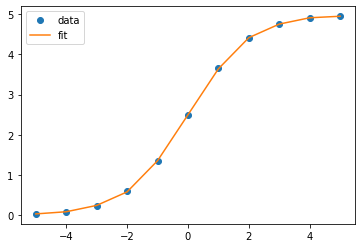

In [22]:
Newfit_y_2 = func1(df_2["time"], Newfit_A_2, Newfit_B_2, Newfit_C_2, Newfit_D_2, Newfit_E_2, Newfit_F_2, Newfit_G_2, Newfit_H_2)
plt.plot(df_2["time"], df_2["xdata"], 'o', label='data')
plt.plot(df_2["time"], Newfit_y_2, '-', label='fit')
plt.legend()

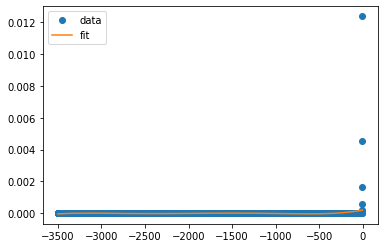

In [23]:
Newfit_y_1 = func1(df_1["time"], Newfit_A_1, Newfit_B_1, Newfit_C_1, Newfit_D_1, Newfit_E_1, Newfit_F_1, Newfit_G_1, Newfit_H_1)
plt.plot(df_1["time"], df_1["xdata"], 'o', label='data')
plt.plot(df_1["time"], Newfit_y_1, '-', label='fit')
plt.legend()

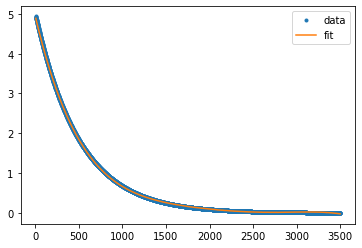

In [24]:
Newfit_y_3 = func1(df_3["time"], Newfit_A_3, Newfit_B_3, Newfit_C_3, Newfit_D_3, Newfit_E_3, Newfit_F_3, Newfit_G_3, Newfit_H_3)
plt.plot(df_3["time"], df_3["xdata"], '.', label='data')
plt.plot(df_3["time"], Newfit_y_3, '-', label='fit')
plt.legend()

In [25]:
ndf1=pd.DataFrame(Newfit_y_1)#,columns=["data"])
ndf2=pd.DataFrame(Newfit_y_2)#,columns=["data"])
ndf3=pd.DataFrame(Newfit_y_3)#,columns=["data"])

ndf=ndf1.append(ndf2,ignore_index=True)
ndf=ndf.append(ndf3,ignore_index=True)
ndf


,time
0,-0.000033
1,-0.000034
2,-0.000033
3,-0.000033
4,-0.000031
...,...
6995,-0.025259
6996,-0.025588
6997,-0.024578
6998,-0.025538


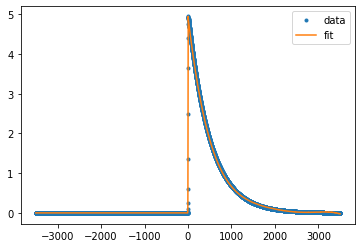

In [26]:
plt.plot(df["time"], df["xdata"], '.', label='data')
plt.plot(df["time"], ndf, '-', label='fit')
plt.legend()